In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df['Sex_'] = np.where(df['Sex']=="female", 1, 0)

In [6]:
df["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)
df['TA'] = np.where((df["SibSp"]+df["Parch"]) > 0, 0, 1)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df1 = pd.get_dummies(df, columns=["Embarked"])

In [7]:
y = df1.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Sex_', 'TA','Pclass','Embarked_C','Embarked_Q','Embarked_S'], axis=1)
x = df1.drop(['PassengerId','Survived','Ticket','Fare','Name','Age','Cabin','Sex','Embarked_C','Embarked_Q','Embarked_S'],axis=1)

In [8]:
X_train = x[0:600]
Xcv = x[600:800]
X_test = x[800:]

Y_train = y[0:600]
Ycv = y[600:800]
Y_test = y[800:]

In [9]:
x

,Pclass,Sex_,TA
0,3,0,0
1,1,1,0
2,3,1,1
3,1,1,0
4,3,0,1
...,...,...,...
886,2,0,1
887,1,1,1
888,3,1,0
889,1,0,1


In [10]:
x.isnull().sum()

Pclass    0
Sex_      0
TA        0
dtype: int64

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
m,n = X_train.shape

In [13]:
def init_params(n):
    w = np.zeros((n,1))
    b = 0
    assert(w.shape == (n, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [14]:
def propogate(X, Y, w, b, L):
    #forward
    A = sigmoid(np.dot(X, w) + b)
    cost = -1/m * ((np.dot(Y.T, np.log(A))) + np.dot((1-Y).T, np.log(1-A))) + (L / 2) * np.sum(np.dot(w, w.T))

    #backward
    dz = A - Y
    dw = 1/m * (np.dot(X.T, (dz)))
    db = 1/m * np.sum(np.sum(dz, axis = 0))

    gradient = {"dw" : dw, "db" : db}
    cost = np.squeeze(cost)
    return gradient, cost

In [15]:
def gradient_descent(X, Y, w, b, L, alpha, epoch):
    costs = []
    for i in range(epoch):
        gradient, cost = propogate(X, Y, w, b, L)
        dw = gradient["dw"]
        db = gradient["db"]

        w = w - alpha*dw
        b = b - alpha*db

        if(i%10 == 0):
            print(f"Epoch: {i}, Cost: {cost}")
            costs.append(cost)
            
        params = {"w" : w, "b" : b}
        gradient = {"dw": dw, "db": db}

    return params, gradient, costs

In [16]:
w, b = init_params(n)

In [17]:
params, grads, costs = gradient_descent(X_train, Y_train, w, b, L=0.1, alpha = 0.02, epoch = 10000)

Epoch: 0, Cost: 0.6931471805599453
Epoch: 10, Cost: 0.6685362336785909
Epoch: 20, Cost: 0.6549420114490607
Epoch: 30, Cost: 0.646436746315357
Epoch: 40, Cost: 0.6403218809122045
Epoch: 50, Cost: 0.6353658469779048
Epoch: 60, Cost: 0.6310026720251553
Epoch: 70, Cost: 0.6269710874118131
Epoch: 80, Cost: 0.6231504361706178
Epoch: 90, Cost: 0.6194851130723791
Epoch: 100, Cost: 0.6159494456820743
Epoch: 110, Cost: 0.6125313177748916
Epoch: 120, Cost: 0.6092245664755072
Epoch: 130, Cost: 0.6060255032654205
Epoch: 140, Cost: 0.60293136743822
Epoch: 150, Cost: 0.5999396744611399
Epoch: 160, Cost: 0.5970479689131819
Epoch: 170, Cost: 0.5942537524655344
Epoch: 180, Cost: 0.5915544815556208
Epoch: 190, Cost: 0.5889475880960098
Epoch: 200, Cost: 0.5864305038504517
Epoch: 210, Cost: 0.584000681436733
Epoch: 220, Cost: 0.5816556102062879
Epoch: 230, Cost: 0.5793928273089506
Epoch: 240, Cost: 0.5772099248849797
Epoch: 250, Cost: 0.5751045543772008
Epoch: 260, Cost: 0.5730744288030416
Epoch: 270, Cost

In [18]:
def predict(w, b, X):
    m = X.shape[0]
    Y_prediction = np.zeros((m, 1))
    A = sigmoid(np.dot(X, w)+b)

    for i in range(A.shape[0]):
        if A[i, 0] > 0.5:
            Y_prediction[i, 0] = 1
        else:
            Y_prediction[i, 0] = 0
    assert(Y_prediction.shape == (m, 1))
    return Y_prediction

In [19]:
Y_pred = predict(params['w'], params['b'], X_test)

Text(0, 0.5, 'Cost')

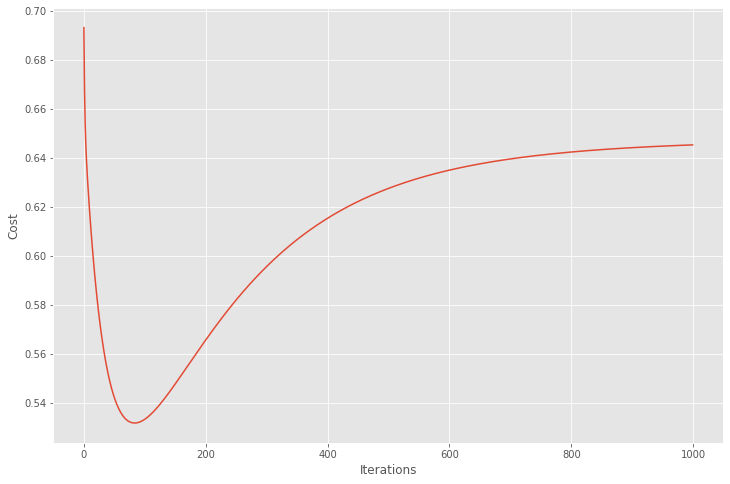

In [20]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")


In [21]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.6769230769230768